
## Linear Regression with Sacramento Real Estate Data


### Read in the Sacramento housing data set.

In [0]:
sac_csv = 'sacramento_real_estate_transactions.csv'

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### Exploratory data analysis (EDA) on this data set. 

In [0]:
# A:
housing = pd.read_csv('sacramento_real_estate_transactions.csv')
housing.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [0]:
housing.shape

(985, 12)

In [0]:
housing.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

No null values found.

In [0]:
housing.info()
#DataTypes looks correct.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [0]:
housing.rename(columns={'zip':'zip_code','beds':'bedrooms','baths':'bathrooms'},inplace=True)
housing.columns

Index(['street', 'city', 'zip_code', 'state', 'bedrooms', 'bathrooms',
       'sq__ft', 'type', 'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

Renamed 'zip' as 'zip_code', 'beds' as 'bedrooms', 'baths' as 'bathrooms' for my convenience.

In [0]:
housing.describe()
#housing.head()

,zip_code,bedrooms,bathrooms,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


While analysing summary statistics, I found minimum bedroom, bathroom as 0 value, and sq__ft area and price minimum value in negative. So, I checked these values in below cells.

In [0]:
#Checked bedrooms that have zero value.
housing[housing['bedrooms'] == 0].head()

,street,city,zip_code,state,bedrooms,bathrooms,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965


I analysed that with bedrooms 0 value, sq__ft value is also 0. Now I checked the area (sq__ft) with the 0 value.

In [0]:
housing[housing['sq__ft'] == 0].head()

,street,city,zip_code,state,bedrooms,bathrooms,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965


In [0]:
# removing rows with zero values in sq__ft column
housing.drop(housing[housing.sq__ft == 0].index, inplace = True)

Removed all the rows which consist of sq__ft area zero. I am assuming that data is entered improperly and it is irrelevant to keep area (sq__ft)of 0 value and having a price for it.

In [0]:
#Checked the price of houses which are in negative.
housing[housing['price'] < 0]

,street,city,zip_code,state,bedrooms,bathrooms,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


Row '703' consis of price in negative and also the sq__ft area in negative. And we can also see that state was also updated wrong, "AC" instead of "CA". I assume that data was entered incorrectly and we can drop this row.

In [0]:
#row dropped
housing.drop(703, inplace = True)
housing.shape

(813, 12)

### Our goal will be to predict the price. List variables that you think qualify as predictors of price in a SLR model. 

**For EACH of these variables you believe to be valid potential predictors in an SLR model, generate a sns.lmplot showing the relationship between the the feature variable and target variable.**

The variables which I think, qualify as predictors of price are bedrooms, bathrooms, and sq__ft. Used Implot in below cells to show the relatioship between the feature variable and price.

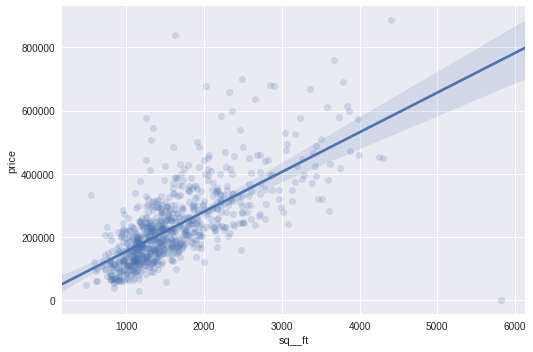

In [0]:
sns.lmplot(x='sq__ft', y='price', data=housing, aspect=1.5, scatter_kws={'alpha':0.2});

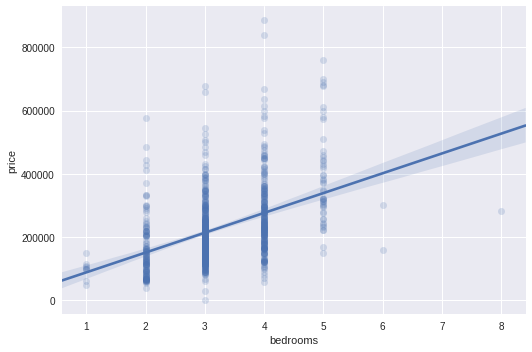

In [0]:
sns.lmplot(x='bedrooms', y='price', data=housing, aspect=1.5, scatter_kws={'alpha':0.2});

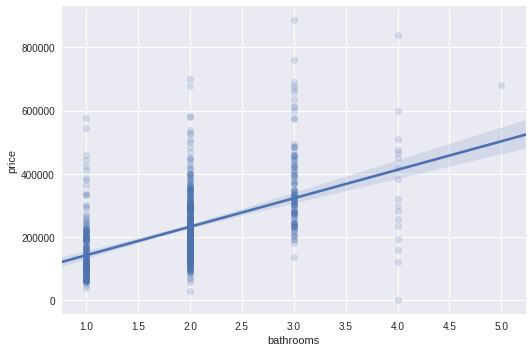

In [0]:
sns.lmplot(x='bathrooms', y='price', data=housing, aspect=1.5, scatter_kws={'alpha':0.2});

### Which SINGLE variable would be the best predictor of Y in a SLR model? Why?

Sq__ft variable will be the best predictor of Y (price) in this SLR model. As shown in above cells, sq__ft is a continuous variable and it seems to be strongly correlated with Y. It is more fit for linear regression model.

### Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**
- **Report its score.**

In [0]:
# A:
# Create X and y.
X = housing[['sq__ft']]
y = housing.price

#print((type(X)))
#print((type(X.values)))
#print((type(y)))
#print((type(y.values)))
#print(X.shape)
#print(y.shape)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# Print the coefficients.
print(lr.intercept_)
print(lr.coef_)

29984.361726519826
[125.31418258]


In [0]:
lr.score(X,y)

0.4814995615437454

### Using the model you came up above, calculate the residuals (MSE) and plot the targets vs. the prediction with the linear regression line.

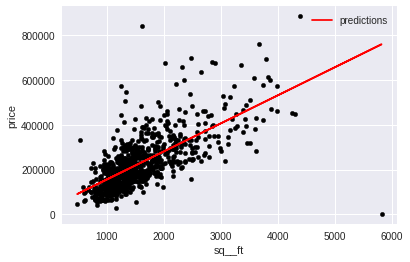

In [0]:
# A:
predictions  =  lr.predict(X)
score        =  lr.score(X,y)
housing['predictions'] = predictions

ax1 = housing.plot(kind='scatter',x='sq__ft', y='price', color='black')
housing.plot(kind='line',x='sq__ft', y='predictions', color='red',ax=ax1);

In [0]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y, predictions))

MSE: 7444498109.2912245
